In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image

## Import Data

In [2]:
data = pd.read_csv('master.csv')

In [3]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [21]:
data = data.rename(columns={'country': 'Country', 'year': 'Year', 'sex': 'Gender', 'age': 'Age', 'suicides_no': 'SuicidesNo', 'population': 'Population', 'suicides/100k pop': 'Suicides100kPop',
                            'country-year': 'CountryYear', 'HDI for year': 'HDIForYear', ' gdp_for_year ($) ': 'GdpForYearMoney', 'gdp_per_capita ($)': 'GdpPerCapitalMoney', 'generation': 'Generation'})

In [22]:
data.head()

,Country,Year,Gender,Age,SuicidesNo,Population,Suicides100kPop,CountryYear,HDIForYear,GdpForYearMoney,GdpPerCapitalMoney,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [6]:
data.dtypes

Country                object
Year                    int64
Gender                 object
Age                    object
SuicidesNo              int64
Population              int64
Suicides100kPop       float64
CountryYear            object
HDIForYear            float64
GdpForYearMoney        object
GdpPerCapitalMoney      int64
Generation             object
dtype: object

### Histogram

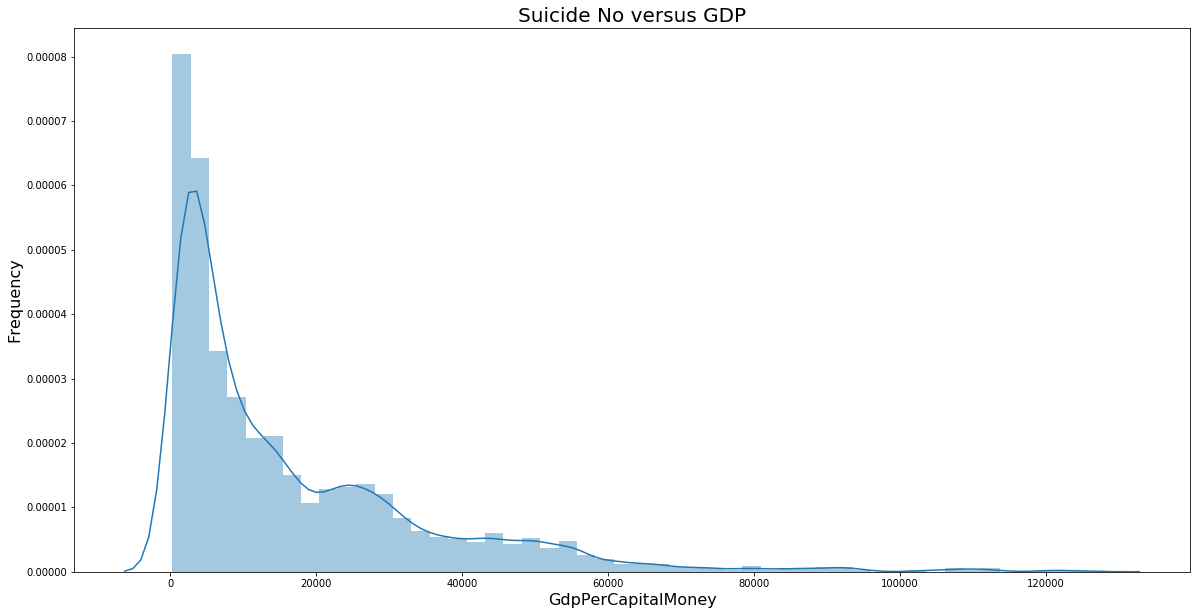

In [7]:
# # An "interface" to matplotlib.axes.Axes.hist() method
plt.figure(figsize=(20,10)) 
# n, bins, patches = plt.hist(x=data.GdpPerCapitalMoney, bins='auto', alpha=0.7)
# plt.grid(axis='y', alpha=0.75)
plt.xlabel('GDP per Capita', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.title('Suicide No versus GDP', fontsize=20)
# maxfreq = n.max()
# # Set a clean upper y-axis limit.
# plt.ylim(0, maxfreq+10)
sns.distplot(data.GdpPerCapitalMoney)

### Barplot

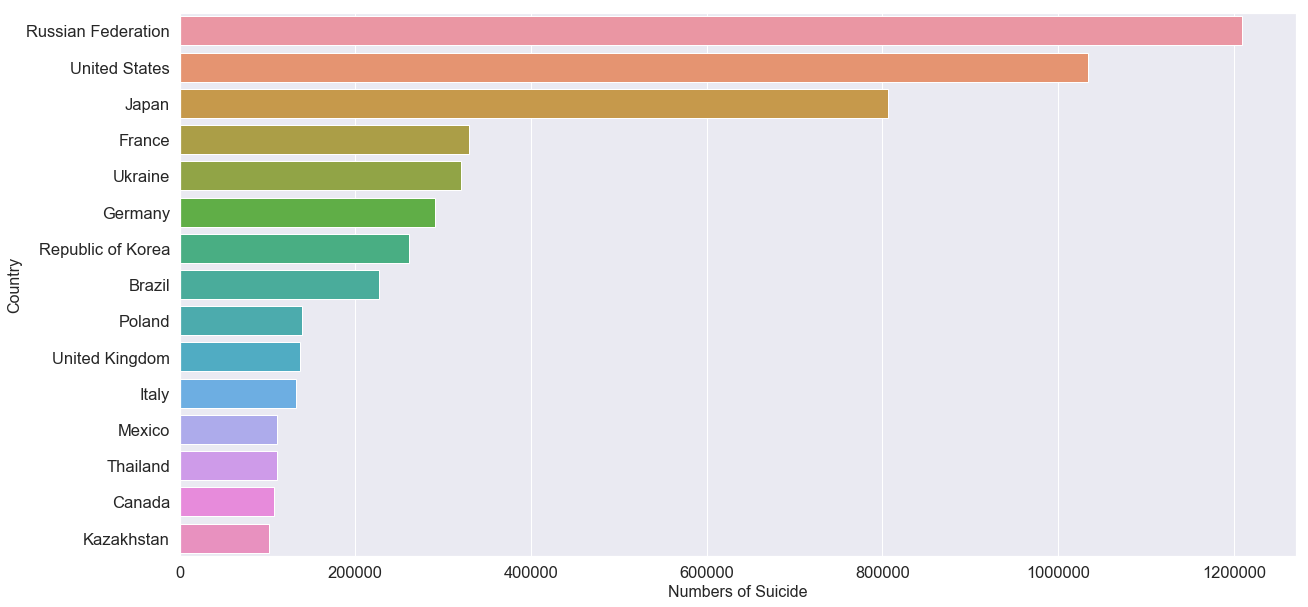

In [17]:
plt.figure(figsize=(20,10)) 

suicidesNo=[]
for country in data.Country.unique():
    suicidesNo.append(sum(data[data['Country']==country].SuicidesNo))
    
suicidesNo=pd.DataFrame(suicidesNo,columns=['suicidesNo'])
country=pd.DataFrame(data.Country.unique(),columns=['country'])
data_suicide_countr=pd.concat([suicidesNo,country],axis=1)

data_suicide_countr=data_suicide_countr.sort_values(by='suicidesNo',ascending=False)

sns.barplot(y=data_suicide_countr.country[:15],x=data_suicide_countr.suicidesNo[:15])
plt.xlabel('Numbers of Suicide', fontsize=16)
plt.ylabel('Country', fontsize=16)
plt.show()

### Boxplot

Text(0, 0.5, 'SuicidesNo')

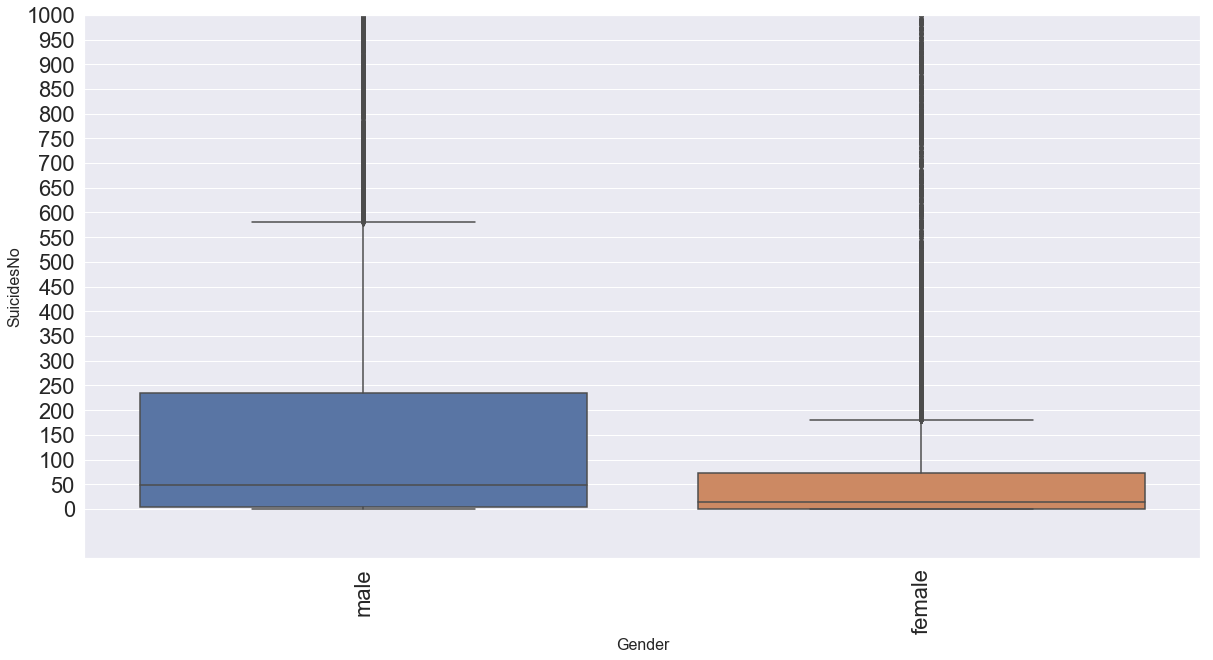

In [37]:
sns.set(font_scale=2)
plt.figure(figsize=(20,10)) 
sns.boxplot(x=data['Gender'],y=data['SuicidesNo'])
plt.xticks(rotation=90)
plt.yticks([i*50 for i in range(0, 100)])
plt.ylim(-100, 1000)
plt.xlabel('Gender', fontsize=16, )
plt.ylabel('SuicidesNo', fontsize=16)

### Scatterplot

<Figure size 1440x720 with 0 Axes>

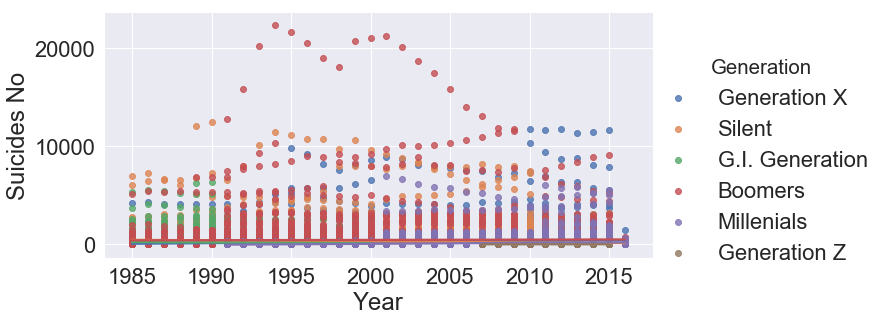

In [39]:
# Plot sepal with as a function of sepal_length across days
plt.figure(figsize=(20,10)) 
g = sns.lmplot(x="Year", y="SuicidesNo", hue="Generation",
               truncate=True, height=5, aspect=2, data=data)

# Use more informative axis labels than are provided by default
g.set_axis_labels("Year", "Suicides No")
plt.show()

### Bubble Map

check tableau

### Chloropleth Map

check tableau

### Connection Map

### Heat map

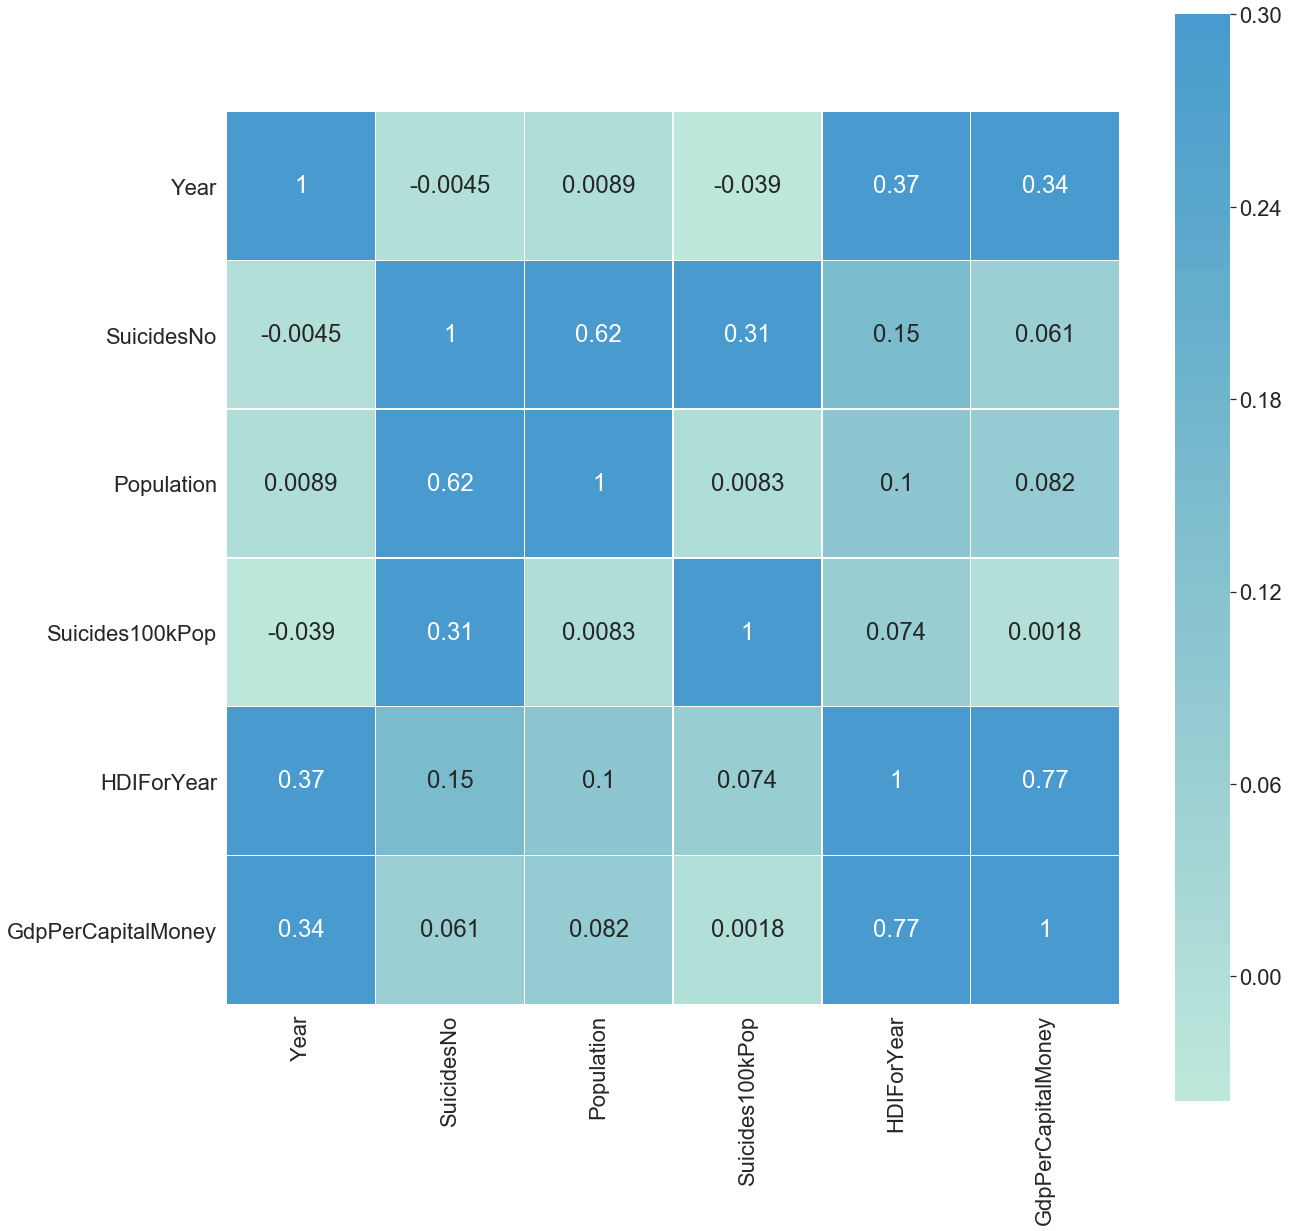

In [44]:
plt.figure(figsize=(20,20)) 

sns.heatmap(data.corr(), vmax=.3, center=1,
            square=True, linewidths=.5,annot=True)
plt.yticks(rotation=0)

plt.show()

### Stacked plot

check tableau

### Treemapping

check tableau